## Logic Based FizzBuzz Function [Software 1.0]

In [35]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    #checking the fizzbuzz logic using standard logic based approach.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [37]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    #because for fizzbuzz problem we are converting inputs to binary format.So to store that data and manipulate it on
    #neural network with layers,we need python's list object.
    ##This is how we define dictionary in python for input.This is our data set.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #To train our model for actual real time data we need training data sets
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #To represent input and output in tabular format.Also it is very easy to do arithmatic operations on rows and columns 
    ##of dataframe(pandas library)
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [38]:
def processData(dataset):
    
    # Why do we have to process?
    ##Input only have one feature.Our input is in the form of integer.To train our model for real time data and to feed this data to neural network
    ##we need to convert it into some sort of form which model can manipulate on efficiently.So we processed it and converted it into
    ##10 digit binary number.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [39]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        ##Input is an interger,it doesn't make any sense just passing one node to neural network.So we are converting it 
        ##into binary number of 10 digits.So that we can train our model for X-input of ten features,which is much better
        ##than passing only one feature to hidden layer.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [40]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.1
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    ##We need model to run our machine learning algorithms.It get created as a result of training data process.Models are 
    ##needed to test training data,so that model can predict results of future inputs.
    
    # Why use Dense layer and then activation?
    ##A Dense layer feeds all outputs from the previous layer/dataset to all its nodes.
    ##It is very important layer to train model so that it can predict outputs of real time data accurately.
    ##Once dense layer perform all operations and we get result.We need to convert it into actual output which is needed.
    
    ##Like for given example we only need four output values.Layers don't directly give us desired result.We need to convert
    ##it into desired output type values(called class) by some function,this function is called activation function.
    ##dense layer are something which do all processing on data and train model,activation function use these
    ##processed value who don't have any bound and convert it into required result.
    ##Because of these reasons we use dense layer first and then activation function.
    
    # Why use sequential model with layers?
    ##Because we have a only one input and we need one output of label(fizz/buzz/fizzbuzz/other).This model is perfect for this type of problem,
    ##where we need only one output from one input.
    ##Sequential model only stacks layers upon previous ones sequentially like a stack or queue.- Keras Documentation
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    ##drop out is a regularisation technique which helps to avoid a problem of overfitting in neural models.It helps avoiding
    ##complex co-adaptation on training data which can affect efficiency of model on real time data.
    ##we used drop out to avoid problem of over fitting and to increase performance of our model to train on data.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    ##We need output to be of only four classes -fizz/buzz/fizzbuzz/other.For this type of problem softmax activation 
    ##function is used which will provide four outputs for given inputs.
    model.summary()
    
    # Why use categorical_crossentropy?
    ##Cross entropy is the loss function.It shows how much predicted output differ from actual output.We wish to show
    ##our output in four label which we can call categories.For this purpose we used categorical cross entropy.
    ##when using the categorical_crossentropy loss, your targets should be in categorical format 
    ##(e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is 
    ##all-zeros expect for a 1 at the index corresponding to the class of the sample).(reference-stackoverflow)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [42]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [43]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5632      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_8 (Activation)    (None, 4)                 0         
Total params: 7,684
Trainable params: 7,684
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [44]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 303us/step - loss: 1.3074 - acc: 0.4528 - val_loss: 1.1925 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 24us/step - loss: 1.1792 - acc: 0.5319 - val_loss: 1.1579 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1542 - acc: 0.5333 - val_loss: 1.1712 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 27us/step - loss: 1.1483 - acc: 0.5333 - val_loss: 1.1601 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1438 - acc: 0.5333 - val_loss: 1.1542 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 32us/step - loss: 1.1444 - acc: 0.5333 - val_loss: 1.1503 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 29us/step - loss: 1.1407 - acc: 0.5333 - val_loss: 1.1515 - val_acc: 0.5333
E

720/720 [==============================] - 0s 24us/step - loss: 0.9695 - acc: 0.5667 - val_loss: 1.0935 - val_acc: 0.5389
Epoch 61/10000
720/720 [==============================] - 0s 22us/step - loss: 0.9691 - acc: 0.5681 - val_loss: 1.0927 - val_acc: 0.5278
Epoch 62/10000
720/720 [==============================] - 0s 19us/step - loss: 0.9641 - acc: 0.5597 - val_loss: 1.0899 - val_acc: 0.5278
Epoch 63/10000
720/720 [==============================] - 0s 18us/step - loss: 0.9567 - acc: 0.5653 - val_loss: 1.0867 - val_acc: 0.5278
Epoch 64/10000
720/720 [==============================] - 0s 20us/step - loss: 0.9539 - acc: 0.5736 - val_loss: 1.0828 - val_acc: 0.5278
Epoch 65/10000
720/720 [==============================] - 0s 20us/step - loss: 0.9480 - acc: 0.5764 - val_loss: 1.0830 - val_acc: 0.5111
Epoch 66/10000
720/720 [==============================] - 0s 21us/step - loss: 0.9408 - acc: 0.5792 - val_loss: 1.0753 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6612 - acc: 0.7667 - val_loss: 0.8722 - val_acc: 0.6944
Epoch 121/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6646 - acc: 0.7681 - val_loss: 0.8680 - val_acc: 0.7111
Epoch 122/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6498 - acc: 0.8014 - val_loss: 0.8632 - val_acc: 0.7222
Epoch 123/10000
720/720 [==============================] - 0s 22us/step - loss: 0.6505 - acc: 0.8028 - val_loss: 0.8597 - val_acc: 0.7278
Epoch 124/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6568 - acc: 0.7750 - val_loss: 0.8533 - val_acc: 0.7167
Epoch 125/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6392 - acc: 0.7861 - val_loss: 0.8510 - val_acc: 0.7111
Epoch 126/10000
720/720 [==============================] - 0s 21us/step - loss: 0.6286 - acc: 0.7917 - val_loss: 0.8447 - val_acc: 0.7111
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 24us/step - loss: 0.4287 - acc: 0.9083 - val_loss: 0.6324 - val_acc: 0.8611
Epoch 180/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4216 - acc: 0.9125 - val_loss: 0.6317 - val_acc: 0.8444
Epoch 181/10000
720/720 [==============================] - 0s 23us/step - loss: 0.4237 - acc: 0.9000 - val_loss: 0.6249 - val_acc: 0.8611
Epoch 182/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4116 - acc: 0.9278 - val_loss: 0.6249 - val_acc: 0.8611
Epoch 183/10000
720/720 [==============================] - 0s 23us/step - loss: 0.4133 - acc: 0.9153 - val_loss: 0.6221 - val_acc: 0.8667
Epoch 184/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4160 - acc: 0.9250 - val_loss: 0.6174 - val_acc: 0.8556
Epoch 185/10000
720/720 [==============================] - 0s 23us/step - loss: 0.4183 - acc: 0.9111 - val_loss: 0.6166 - val_acc: 0.8611
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.2926 - acc: 0.9431 - val_loss: 0.4827 - val_acc: 0.8944
Epoch 239/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2976 - acc: 0.9472 - val_loss: 0.4799 - val_acc: 0.8944
Epoch 240/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2927 - acc: 0.9556 - val_loss: 0.4759 - val_acc: 0.9000
Epoch 241/10000
720/720 [==============================] - 0s 20us/step - loss: 0.2892 - acc: 0.9500 - val_loss: 0.4746 - val_acc: 0.9000
Epoch 242/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2973 - acc: 0.9375 - val_loss: 0.4734 - val_acc: 0.9000
Epoch 243/10000
720/720 [==============================] - 0s 23us/step - loss: 0.2958 - acc: 0.9431 - val_loss: 0.4683 - val_acc: 0.9056
Epoch 244/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2720 - acc: 0.9556 - val_loss: 0.4763 - val_acc: 0.8889
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 24us/step - loss: 0.2180 - acc: 0.9597 - val_loss: 0.3935 - val_acc: 0.9000
Epoch 298/10000
720/720 [==============================] - 0s 29us/step - loss: 0.2097 - acc: 0.9583 - val_loss: 0.3894 - val_acc: 0.9056
Epoch 299/10000
720/720 [==============================] - 0s 24us/step - loss: 0.2195 - acc: 0.9597 - val_loss: 0.3880 - val_acc: 0.9056
Epoch 300/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2057 - acc: 0.9722 - val_loss: 0.3888 - val_acc: 0.9111
Epoch 301/10000
720/720 [==============================] - 0s 23us/step - loss: 0.2112 - acc: 0.9681 - val_loss: 0.3859 - val_acc: 0.9167
Epoch 302/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2172 - acc: 0.9583 - val_loss: 0.3818 - val_acc: 0.9167
Epoch 303/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1969 - acc: 0.9708 - val_loss: 0.3813 - val_acc: 0.9167
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.1739 - acc: 0.9694 - val_loss: 0.3402 - val_acc: 0.9167
Epoch 357/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1739 - acc: 0.9667 - val_loss: 0.3466 - val_acc: 0.9111
Epoch 358/10000
720/720 [==============================] - 0s 25us/step - loss: 0.1855 - acc: 0.9694 - val_loss: 0.3330 - val_acc: 0.9222
Epoch 359/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1658 - acc: 0.9750 - val_loss: 0.3407 - val_acc: 0.9167
Epoch 360/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1654 - acc: 0.9653 - val_loss: 0.3319 - val_acc: 0.9278
Epoch 361/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1710 - acc: 0.9708 - val_loss: 0.3347 - val_acc: 0.9167
Epoch 362/10000
720/720 [==============================] - 0s 27us/step - loss: 0.1598 - acc: 0.9722 - val_loss: 0.3372 - val_acc: 0.9167
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.1240 - acc: 0.9861 - val_loss: 0.2989 - val_acc: 0.9333
Epoch 416/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1473 - acc: 0.9736 - val_loss: 0.3012 - val_acc: 0.9389
Epoch 417/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1326 - acc: 0.9722 - val_loss: 0.2965 - val_acc: 0.9389
Epoch 418/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1376 - acc: 0.9694 - val_loss: 0.2954 - val_acc: 0.9333
Epoch 419/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1384 - acc: 0.9694 - val_loss: 0.2934 - val_acc: 0.9333
Epoch 420/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1361 - acc: 0.9736 - val_loss: 0.2878 - val_acc: 0.9389
Epoch 421/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1446 - acc: 0.9681 - val_loss: 0.2834 - val_acc: 0.9389
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 20us/step - loss: 0.1095 - acc: 0.9861 - val_loss: 0.2700 - val_acc: 0.9333
Epoch 475/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1091 - acc: 0.9833 - val_loss: 0.2699 - val_acc: 0.9389
Epoch 476/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1168 - acc: 0.9792 - val_loss: 0.2737 - val_acc: 0.9333
Epoch 477/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1226 - acc: 0.9736 - val_loss: 0.2672 - val_acc: 0.9333
Epoch 478/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1166 - acc: 0.9819 - val_loss: 0.2725 - val_acc: 0.9333
Epoch 479/10000
720/720 [==============================] - 0s 19us/step - loss: 0.1136 - acc: 0.9806 - val_loss: 0.2774 - val_acc: 0.9333
Epoch 480/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1172 - acc: 0.9806 - val_loss: 0.2750 - val_acc: 0.9333
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.0998 - acc: 0.9861 - val_loss: 0.2646 - val_acc: 0.9333
Epoch 534/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1159 - acc: 0.9681 - val_loss: 0.2595 - val_acc: 0.9500
Epoch 535/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1128 - acc: 0.9806 - val_loss: 0.2616 - val_acc: 0.9333
Epoch 536/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1234 - acc: 0.9569 - val_loss: 0.2655 - val_acc: 0.9389
Epoch 537/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1069 - acc: 0.9792 - val_loss: 0.2657 - val_acc: 0.9333
Epoch 538/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1026 - acc: 0.9792 - val_loss: 0.2638 - val_acc: 0.9389
Epoch 539/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0936 - acc: 0.9833 - val_loss: 0.2643 - val_acc: 0.9389
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.1017 - acc: 0.9778 - val_loss: 0.2357 - val_acc: 0.9444
Epoch 593/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0919 - acc: 0.9778 - val_loss: 0.2513 - val_acc: 0.9278
Epoch 594/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1002 - acc: 0.9778 - val_loss: 0.2508 - val_acc: 0.9389
Epoch 595/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0930 - acc: 0.9819 - val_loss: 0.2464 - val_acc: 0.9500
Epoch 596/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0890 - acc: 0.9833 - val_loss: 0.2490 - val_acc: 0.9389
Epoch 597/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0835 - acc: 0.9875 - val_loss: 0.2575 - val_acc: 0.9333
Epoch 598/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1042 - acc: 0.9764 - val_loss: 0.2444 - val_acc: 0.9389
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 19us/step - loss: 0.0806 - acc: 0.9819 - val_loss: 0.2309 - val_acc: 0.9444
Epoch 652/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0877 - acc: 0.9806 - val_loss: 0.2334 - val_acc: 0.9444
Epoch 653/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0861 - acc: 0.9792 - val_loss: 0.2402 - val_acc: 0.9389
Epoch 654/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0854 - acc: 0.9806 - val_loss: 0.2347 - val_acc: 0.9389
Epoch 655/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0775 - acc: 0.9889 - val_loss: 0.2384 - val_acc: 0.9389
Epoch 656/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0810 - acc: 0.9819 - val_loss: 0.2443 - val_acc: 0.9444
Epoch 657/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0774 - acc: 0.9861 - val_loss: 0.2414 - val_acc: 0.9333
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 20us/step - loss: 0.0688 - acc: 0.9847 - val_loss: 0.2354 - val_acc: 0.9333
Epoch 711/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0644 - acc: 0.9903 - val_loss: 0.2383 - val_acc: 0.9389
Epoch 712/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0679 - acc: 0.9861 - val_loss: 0.2517 - val_acc: 0.9333
Epoch 713/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0846 - acc: 0.9778 - val_loss: 0.2344 - val_acc: 0.9389
Epoch 714/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0728 - acc: 0.9847 - val_loss: 0.2288 - val_acc: 0.9500
Epoch 715/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0927 - acc: 0.9792 - val_loss: 0.2405 - val_acc: 0.9389
Epoch 716/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0695 - acc: 0.9819 - val_loss: 0.2315 - val_acc: 0.9389
Epoch 717/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126fd00f0>,
      dtype=object)

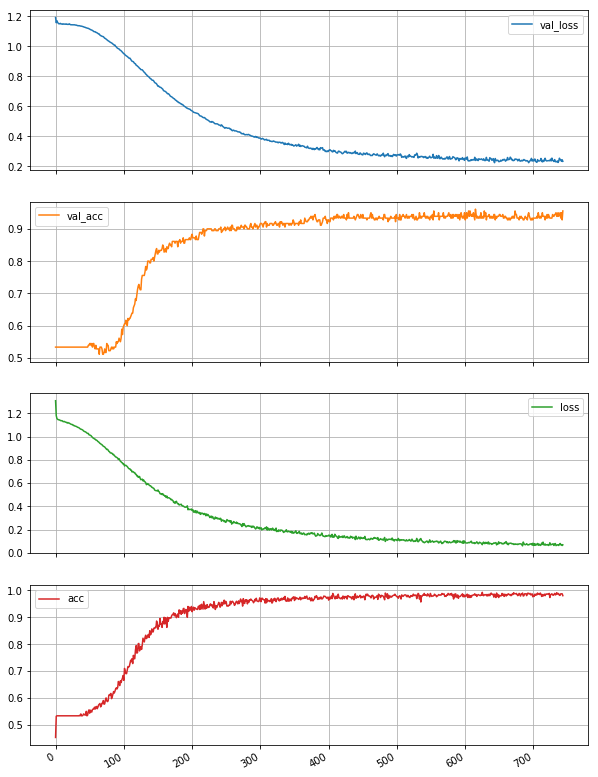

In [45]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [46]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [47]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "vgawade")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50290596")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 5  Correct :95
Testing Accuracy: 95.0


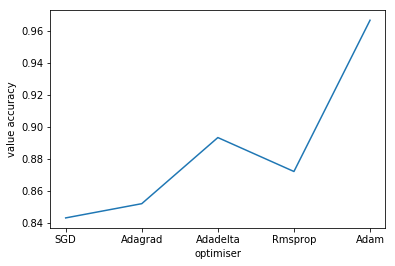

In [49]:
import matplotlib.pyplot as plt
import numpy as np

y = [0.8432,0.8521,0.8934,0.8722,0.9667]
x = ["SGD", "Adagrad", "Adadelta", "Rmsprop","Adam"]
plt.ylabel('value accuracy')
plt.xlabel('optimiser')
plt.plot(x,y)
plt.show()